In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import ensemble
from sklearn.model_selection import train_test_split

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

from nltk.corpus import gutenberg, stopwords

In [2]:
# Import raw versions of text to view for cleaning
sense_raw = gutenberg.raw("austen-sense.txt")
cesar_raw = gutenberg.raw("shakespeare-caesar.txt")
blake_raw = gutenberg.raw("blake-poems.txt")
chesterton_raw = gutenberg.raw("chesterton-ball.txt")
edgeworth_raw = gutenberg.raw("edgeworth-parents.txt")
carroll_raw = gutenberg.raw("carroll-alice.txt")
bryant_raw = gutenberg.raw("bryant-stories.txt")
burgess_raw = gutenberg.raw("burgess-busterbrown.txt")
whitman_raw = gutenberg.raw("whitman-leaves.txt")


In [3]:
# Import text as paragraphs
sense = gutenberg.paras("austen-sense.txt")
cesar = gutenberg.paras("shakespeare-caesar.txt")
blake = gutenberg.paras("blake-poems.txt")
chesterton = gutenberg.paras("chesterton-ball.txt")
edgeworth = gutenberg.paras("edgeworth-parents.txt")
carroll = gutenberg.paras("carroll-alice.txt")
bryant = gutenberg.paras("bryant-stories.txt")
burgess = gutenberg.paras("burgess-busterbrown.txt")
whitman = gutenberg.paras("whitman-leaves.txt")


In [4]:
# See length of each text
print(len(sense))
print(len(cesar))
print(len(blake))
print(len(chesterton))
print(len(edgeworth))
print(len(carroll))
print(len(bryant))
print(len(burgess))
print(len(whitman))

1862
744
284
1606
3726
817
1194
266
2478


In [5]:
# Set max to use
max=266

In [6]:
# Modified text with a cap
sense = gutenberg.paras("austen-sense.txt")
cesar = gutenberg.paras("shakespeare-caesar.txt")
blake = gutenberg.paras("blake-poems.txt")
chesterton = gutenberg.paras("chesterton-ball.txt")
edgeworth = gutenberg.paras("edgeworth-parents.txt")
carroll = gutenberg.paras("carroll-alice.txt")
bryant = gutenberg.paras("bryant-stories.txt")
burgess = gutenberg.paras("burgess-busterbrown.txt")
whitman = gutenberg.paras("whitman-leaves.txt")


In [7]:
# Final text length
print(len(sense))
print(len(cesar))
print(len(blake))
print(len(chesterton))
print(len(edgeworth))
print(len(carroll))
print(len(bryant))
print(len(burgess))
print(len(whitman))

1862
744
284
1606
3726
817
1194
266
2478


In [8]:
#Look at raw text to determine cleaning needed
whitman_raw

'[Leaves of Grass by Walt Whitman 1855]\n\n\nCome, said my soul,\nSuch verses for my Body let us write, (for we are one,)\nThat should I after return,\nOr, long, long hence, in other spheres,\nThere to some group of mates the chants resuming,\n(Tallying Earth\'s soil, trees, winds, tumultuous waves,)\nEver with pleas\'d smile I may keep on,\nEver and ever yet the verses owning--as, first, I here and now\nSigning for Soul and Body, set to them my name,\n\nWalt Whitman\n\n\n\n[BOOK I.  INSCRIPTIONS]\n\n}  One\'s-Self I Sing\n\nOne\'s-self I sing, a simple separate person,\nYet utter the word Democratic, the word En-Masse.\n\nOf physiology from top to toe I sing,\nNot physiognomy alone nor brain alone is worthy for the Muse, I say\n    the Form complete is worthier far,\nThe Female equally with the Male I sing.\n\nOf Life immense in passion, pulse, and power,\nCheerful, for freest action form\'d under the laws divine,\nThe Modern Man I sing.\n\n\n\n}  As I Ponder\'d in Silence\n\nAs I pon

In [9]:
# Function to turn text into paragraphs and pass through vectorizer
def text_to_paragraphs(input, Author):
    output=[]
    text=input
    for paragraph in input:
        para=paragraph[0]
        #removing the double-dash from all words
        para=[re.sub(r'--','',word) for word in para]
        para=[re.sub("[\[].*?[\]]", "",word) for word in para]
        para=[re.sub(r"Chapter \d+", "",word) for word in para]
        para=[re.sub(r"CHAPTER .*", "",word) for word in para]
        para=[re.sub(r"Actus .*", "",word) for word in para]
        para=[re.sub(r"BOOK .", "",word) for word in para]

        
        #Forming each paragraph into a string and adding it to the list of strings.
        output.append(' '.join(para))
        
    X_train, X_test = train_test_split(output, test_size=0.05, random_state=0)

    vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                                 min_df=3,
                                 stop_words='english', 
                                 lowercase=True, 
                                 use_idf=True,
                                 norm=u'l2', 
                                 smooth_idf=True)


    #Applying the vectorizer
    output_tfidf=vectorizer.fit_transform(output)
    
    #splitting into training and test sets
    X_train_tfidf, X_test_tfidf= train_test_split(output_tfidf, test_size=0.05, random_state=0)


    #Reshapes the vectorizer output into something people can read
    X_train_tfidf_csr = X_train_tfidf.tocsr()

    #number of paragraphs
    n = X_train_tfidf_csr.shape[0]
    #A list of dictionaries, one per paragraph
    tfidf_bypara = [{} for _ in range(0,n)]
    #List of features
    terms = vectorizer.get_feature_names()
    #for each paragraph, lists the feature words and their tf-idf scores
    for i, j in zip(*X_train_tfidf_csr.nonzero()):
        tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

        #Our SVD data reducer.  
    svd= TruncatedSVD(42)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    # Run SVD on the training data, then project the training data.
    X_train_lsa = lsa.fit_transform(X_train_tfidf)

    variance_explained=svd.explained_variance_ratio_
    total_variance = variance_explained.sum()
    #print("Percent variance captured by all components:",total_variance*100)
    
    final_output=pd.DataFrame(X_train_lsa,index=X_train)
    final_output["Author"] = Author
    return(final_output)

In [10]:
# Run function on each text
sense_paragraphs= text_to_paragraphs(sense, "Austen")
cesar_paragraphs = text_to_paragraphs(cesar, "Shakespeare")
blake_paragraphs = text_to_paragraphs(blake, "Blake")
chesterton_paragraphs = text_to_paragraphs(chesterton, "Chesterton")
edgeworth_paragraphs = text_to_paragraphs(edgeworth, "Edgeworth")
carroll_paragraphs = text_to_paragraphs(carroll, "Carroll")
bryant_paragraphs = text_to_paragraphs(bryant, "Bryant")
burgess_paragraphs = text_to_paragraphs(burgess, "Burgess")
whitman_paragraphs = text_to_paragraphs(whitman, "Whitman")

In [11]:
# Text list of what will be run through model
text_list = []
text_list = [sense_paragraphs,
             cesar_paragraphs,
             blake_paragraphs,
             chesterton_paragraphs,
             edgeworth_paragraphs,
             carroll_paragraphs, 
             bryant_paragraphs,
             burgess_paragraphs,
             whitman_paragraphs
            ]

In [12]:
# K-Means clustering
cluster_count = 3

start = pd.DataFrame()
combined=start.append(text_list)

#Create x and y for modeling

clustering_x = combined.drop(["Author"],axis=1)
clustering_y=pd.DataFrame()

clustering_y["Author"] = combined["Author"]
clustering_y= clustering_y["Author"].tolist()

# Run K-Means 
y_pred = KMeans(n_clusters=cluster_count, random_state=47).fit_predict(clustering_x)

# Create final dataframe

final_df=pd.DataFrame()
final_df["Author"] = combined["Author"]
final_df["cluster"] = y_pred

# Create dataframe for plotting 

grouped = final_df.groupby(by=['cluster','Author']).size().reset_index(name="counts")

In [13]:
# Function to plot clusters
def plot_cluster(cluster):
    group_0 = grouped[grouped["cluster"] == cluster]
    group_0.plot.bar(x="Author", y="counts")

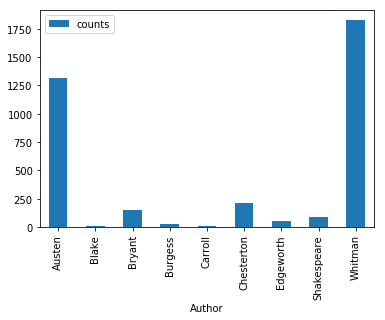

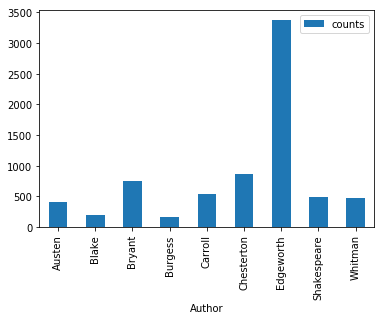

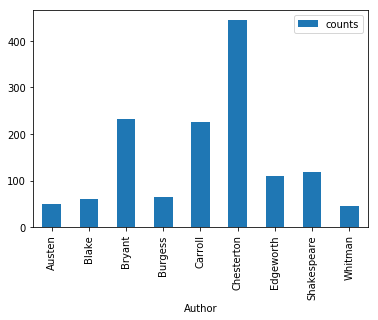

In [14]:
# Plot clusters
number_of_clusters = range(0,cluster_count)
for number in number_of_clusters:
    plot_cluster(number)